In [12]:
import pandas as pd
import matplotlib.pyplot as plt

main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")

In [13]:
main_df.isnull().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  163
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                62316
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
d

In [14]:
main_df.dropna(axis=0,inplace=True)
#main_df["AMT_GOODS_PRICE"].dropna(axis=0,inplace=True)

In [15]:
main_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [16]:
df_dfaulters = main_df[main_df['TARGET']==1]
df_normal = main_df[main_df['TARGET']==0]

In [17]:
df_dfaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,1,1,0,1,1,0,Laborers,2,2,Business Entity Type 3
1,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,...,1,1,0,1,0,0,Cooking staff,3,2,Business Entity Type 3
2,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
3,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,...,1,1,1,1,1,0,Sales staff,3,3,Self-employed
6,100130,1,Cash loans,F,N,Y,157500.0,723996.0,30802.5,585000.0,...,1,1,0,1,1,0,Sales staff,2,2,Trade: type 2


In [18]:
df_normal.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
24825,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,1,1,0,1,1,0,Core staff,1,1,School
24826,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,1,1,1,1,1,0,Laborers,2,2,Government
24827,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
24828,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,1,1,0,1,0,0,Core staff,2,2,Religion
24829,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,1,1,1,1,1,0,Laborers,2,2,Other


In [70]:
#Statistical summary
stat_normal = df_normal.agg({
    "AMT_INCOME_TOTAL":["min", "max", 'mean',"median","std"],
    "AMT_CREDIT":["min", "max", 'mean',"median","std"],
    "AMT_ANNUITY":["min", "max", 'mean',"median","std"],
    "AMT_GOODS_PRICE":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT_W_CITY":["min", "max", 'mean',"median","std"]
    })
stat_defaulters = df_dfaulters.agg({
    "AMT_INCOME_TOTAL":["min", "max", 'mean',"median","std"],
    "AMT_CREDIT":["min", "max", 'mean',"median","std"],
    "AMT_ANNUITY":["min", "max", 'mean',"median","std"],
    "AMT_GOODS_PRICE":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT_W_CITY":["min", "max", 'mean',"median","std"]
    })

print(stat_normal)
print(stat_defaulters)

        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
min         2.565000e+04  4.500000e+04    1980.000000     4.500000e+04   
max         9.000000e+06  4.050000e+06  258025.500000     4.050000e+06   
mean        1.763155e+05  6.165580e+05   27938.316454     5.546664e+05   
median      1.575000e+05  5.212800e+05   25933.500000     4.500000e+05   
std         1.085158e+05  4.112805e+05   14899.864509     3.779636e+05   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
min                 1.000000                     1.000000  
max                 3.000000                     3.000000  
mean                2.038820                     2.017419  
median              2.000000                     2.000000  
std                 0.509061                     0.503236  
        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
min         2.700000e+04  4.500000e+04    3172.500000     4.500000e+04   
max         1.170000e+08  3.020760e+06  127507.

C:\Users\zw\AppData\Local\Temp\ipykernel_4512\2466455518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dfaulters['years_birth'] = -(df_dfaulters['DAYS_BIRTH']//365)
C:\Users\zw\AppData\Local\Temp\ipykernel_4512\2466455518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)


count    18530.000000
mean        38.822882
std          9.671028
min         22.000000
25%         31.000000
50%         38.000000
75%         46.000000
max         69.000000
Name: years_birth, dtype: float64
count    119011.000000
mean         41.151994
std           9.995940
min          22.000000
25%          33.000000
50%          41.000000
75%          49.000000
max          70.000000
Name: years_birth, dtype: float64


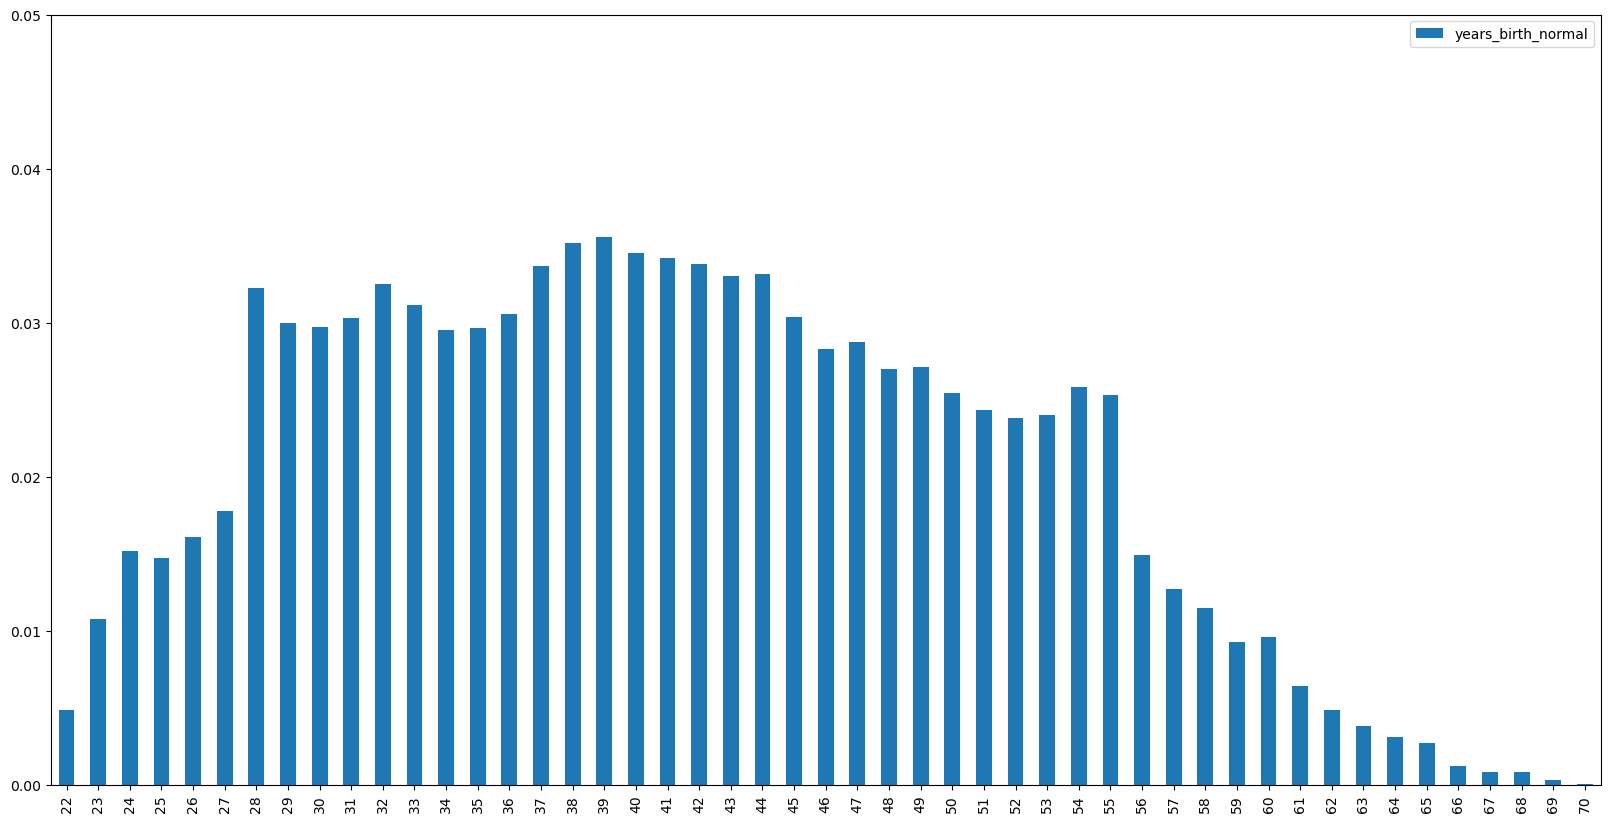

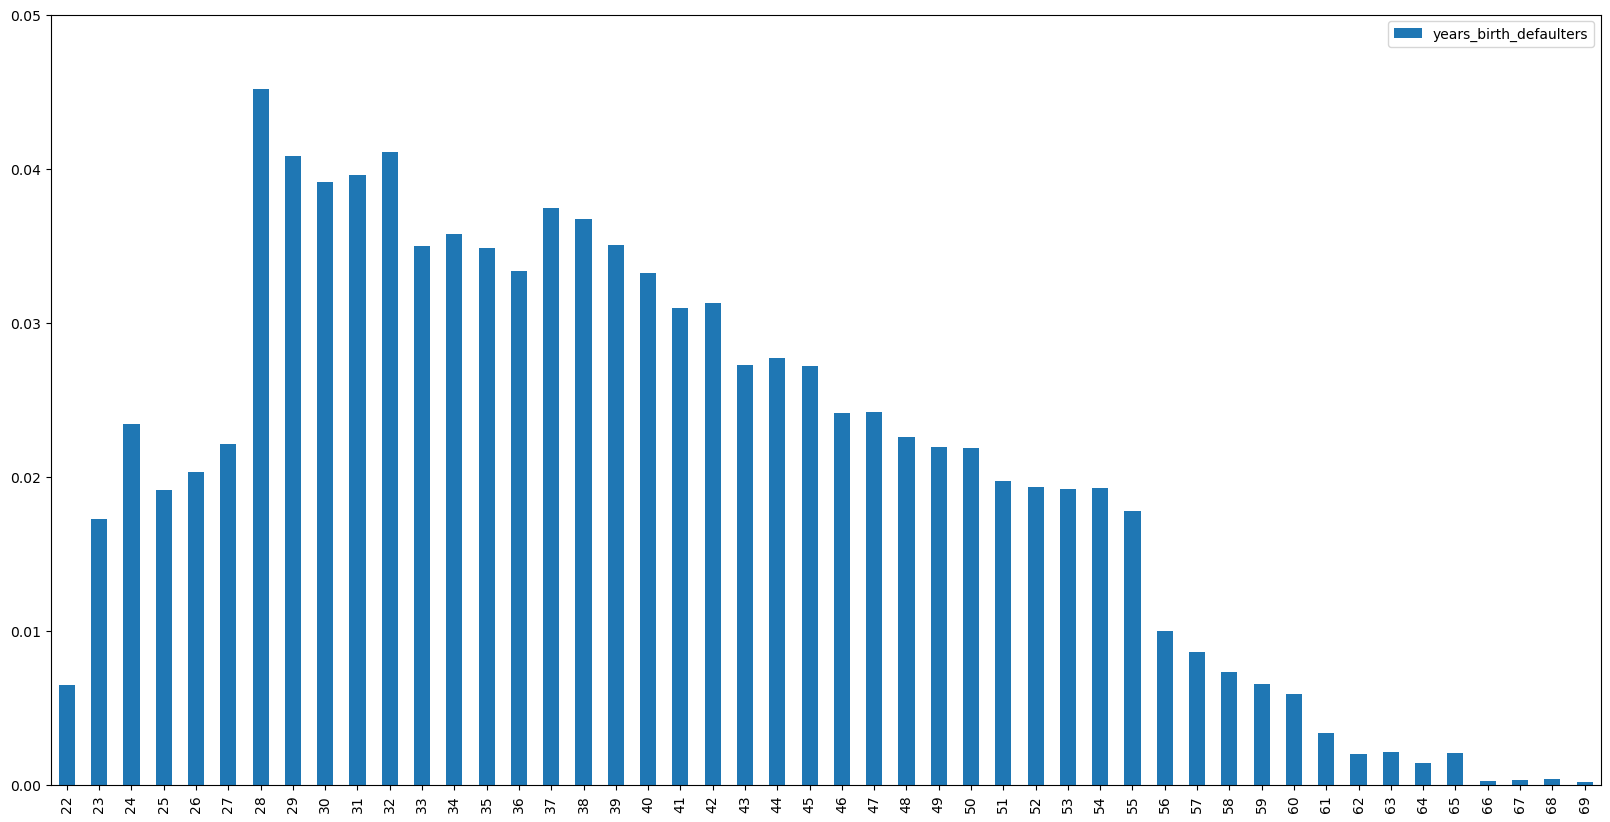

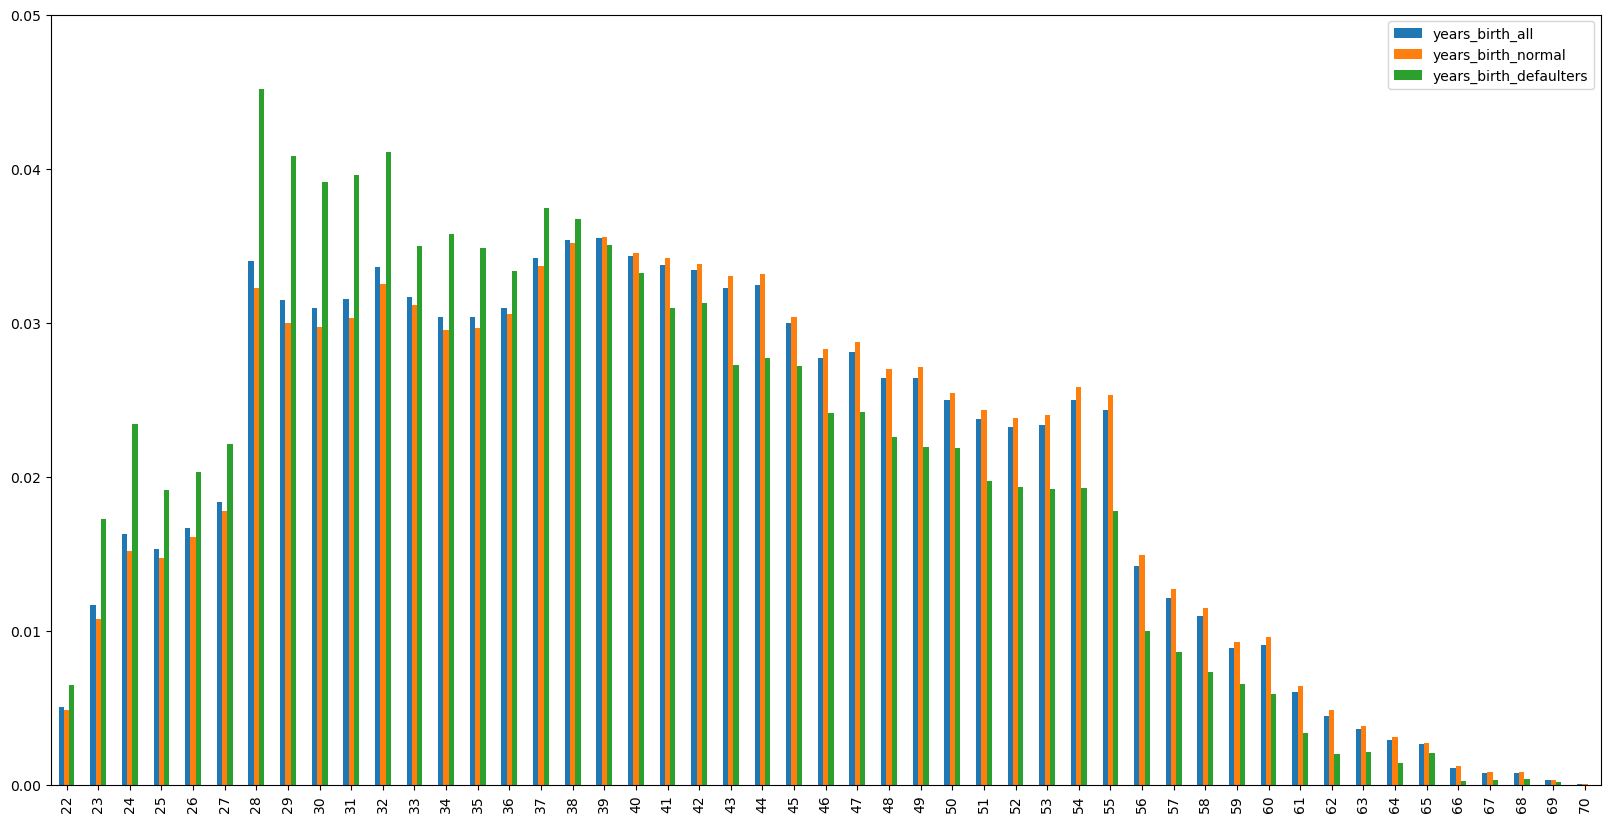

In [68]:
# AGE
#get years birth 
main_df['years_birth'] = -(main_df['DAYS_BIRTH']//365)
df_dfaulters['years_birth'] = -(df_dfaulters['DAYS_BIRTH']//365)
df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)
#get narmalized data
years_df = pd.DataFrame(main_df['years_birth'].value_counts(normalize=True).sort_index())
years_df.columns = (["years_birth_all"])
years_df_normal = pd.DataFrame(df_normal['years_birth'].value_counts(normalize=True).sort_index())
years_df_normal.columns = (["years_birth_normal"])
years_df_defaulters = pd.DataFrame(df_dfaulters['years_birth'].value_counts(normalize=True).sort_index())
years_df_defaulters.columns = (["years_birth_defaulters"])
years_df = years_df.join(years_df_normal)
years_df = years_df.join(years_df_defaulters)
# figures
fig1 = years_df_normal.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig1.png')
fig2 = years_df_defaulters.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig2.png')
fig3 = years_df.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig3.png')
print(df_dfaulters['years_birth'].describe())
print(df_normal['years_birth'].describe())
#
#
#

Age is left skewed, defaulters are more likely to be younger age. 

   REGION_RATING_CLIENT
1              0.062601
2              0.720399
3              0.216999
   REGION_RATING_CLIENT
1              0.110914
2              0.739352
3              0.149734
count    18530.000000
mean         2.154398
std          0.505743
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT, dtype: float64
count    119011.000000
mean          2.038820
std           0.509061
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


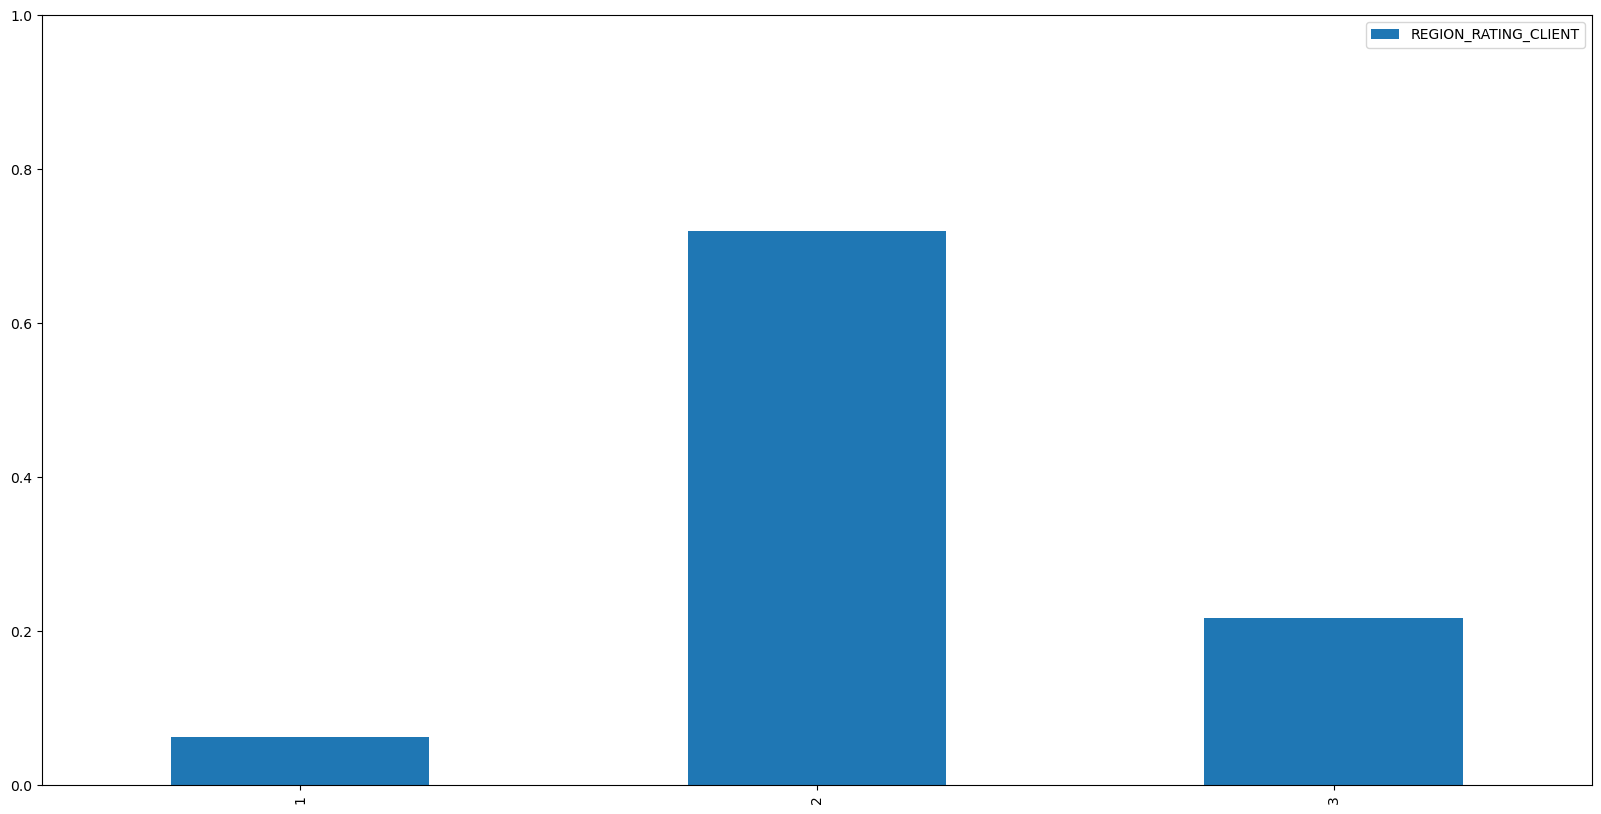

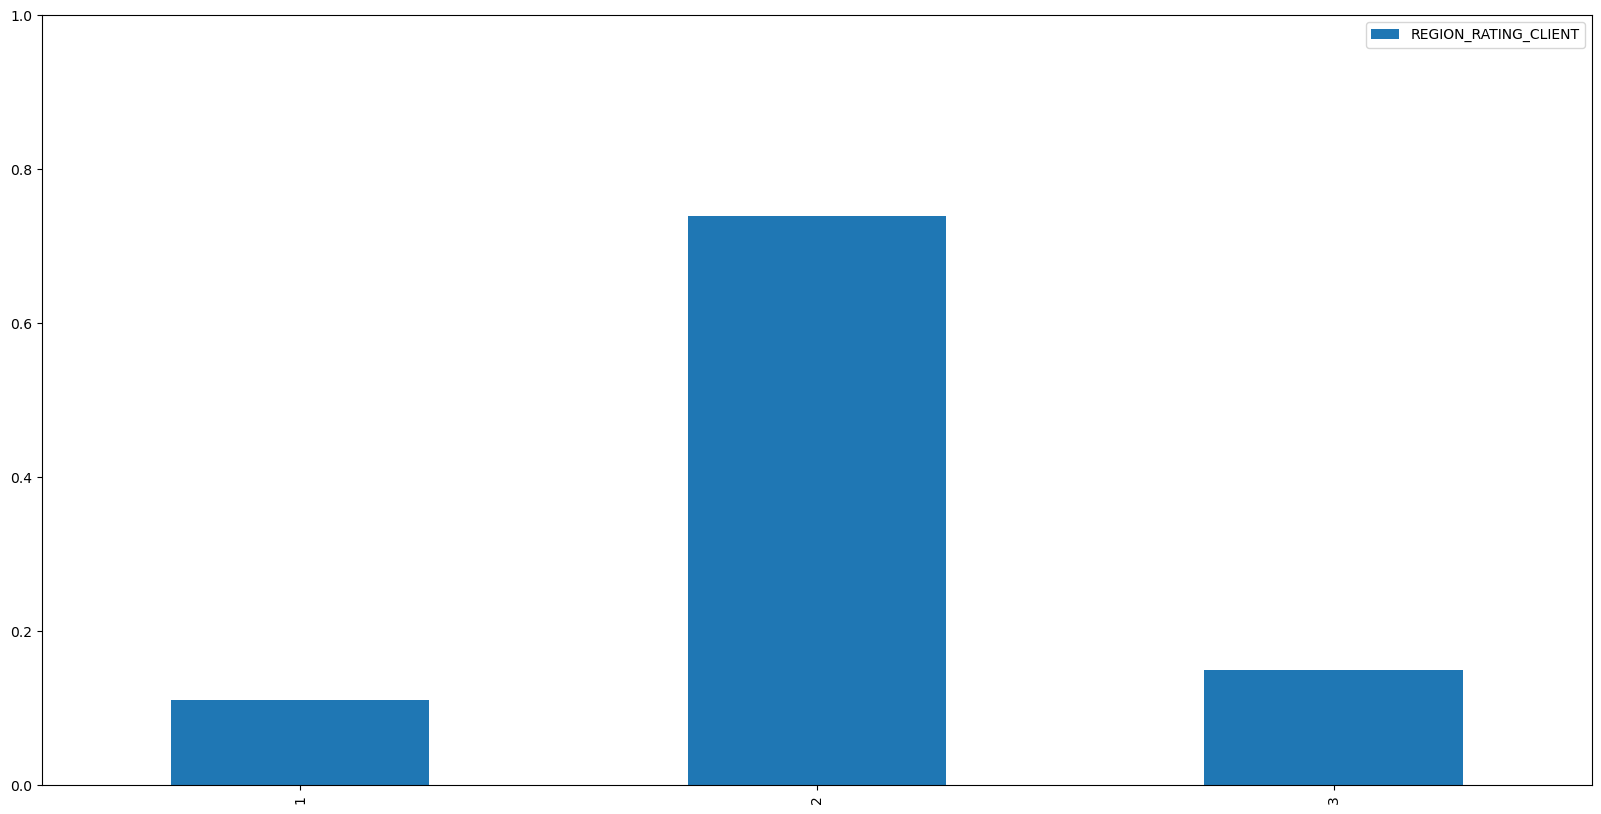

In [73]:
# Location REGION_RATING_CLIENT
location_defaulters = pd.DataFrame(df_dfaulters["REGION_RATING_CLIENT"].value_counts(normalize=True).sort_index())
location_normal = pd.DataFrame(df_normal["REGION_RATING_CLIENT"].value_counts(normalize=True).sort_index())
fig2_1 = location_defaulters.plot.bar(figsize = (20,10),ylim=(0.0,1))
plt.savefig('figures\\fig2_1.png')
fig2_2 = location_normal.plot.bar(figsize = (20,10),ylim=(0.0,1))
plt.savefig('figures\\fig2_2.png')
print(location_defaulters)
print(location_normal)
print(df_dfaulters["REGION_RATING_CLIENT"].describe())
print(df_normal["REGION_RATING_CLIENT"].describe())


Normal customer has higher percentage than defaulters in region rated 1, similar percentage in region rated 2, and lower percentage in region rate 3.